# Regression vs Classification

Regression is used when we want to predict the value of a numerical value (real number). For example, predicting the price of a house or the price of  particular stock.

Classification is used when the value that we want to predict is one of a finite set of possible classes.

### Linear equations

y = mx + c (straight line in two dimensions, gradient m, y-intercept c)

y = $w_0$ + $w_1x_1$ + $w_2x_2$ + $w_3x_3$ + ... + $w_nx_n$ (linear equation in $n$ dimensions)

### Linear regression

The objective is to find the values of the $w_i$ that minimize the error.

# Machine Learning

In general Machine Learning models, including neural networks have a lot of parameters or weights, such as the $w_i$ above. Some large language models can have over 100 billion parameters.
There is no mathematical formula to get the best values for the $w_i$.

In Neual Network development, the programmer decides on the neural network architecture:
- number of layers,
- number and type of neurons in each layer,
- how the neurons are interconnected,
- functions used in each neuron layer (activation functions),
- etc

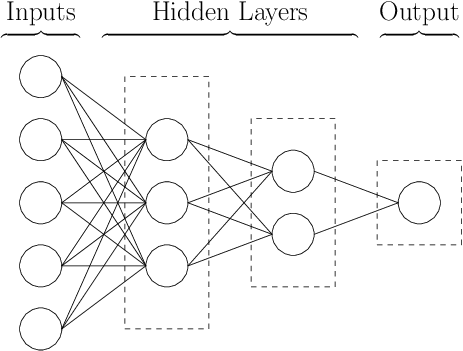

Each line above has an associated weight (plus one weight for the bias $w_0$).

Training the Neural Network involves trying to determine the best values for the weights/parameters.

## Gradient Descent

Since there is no way of knowing up front what the parameters/weights should be, a common approach is to assign the initial values randomly. Naturally, this will lead to a large initial error.

We can think of the error as forming a landscape (as a function of the $w_i$). The idea is that we want to navigate this landscape to find the lowest point.

We repeat the following loop until the error is small enough:

- Compute the error using the current weights
- Determine the gradients in the error landscape
- Determine the step to take (to go downhill)
- Update the weights based on this step
- Repeat

See https://en.wikipedia.org/wiki/Gradient_descent

Note that the libraries/packages take care of the training implementation, so you don't need to know how to compute the gradient, etc.

## One Hot Encoding for Categorical Data

ML models work on numerical data. Categorical data that has only a few possible values can be represented using one-hot encoding. If the example belongs to a particular class A, the column for class A will be a 1 and the columns for all the other categories will be 0.

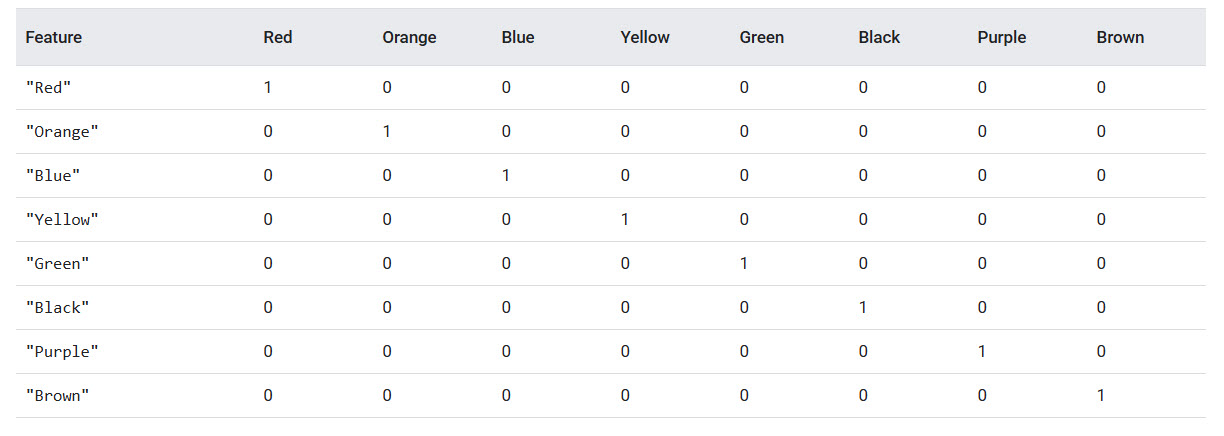



# Iris Data set - Example of Classification Problem

Classic dataset about irises. There are 3 types of Iris flowers considered:
- Setosa
- Virginica
- Versicolor

The objective is to determine the type of the flower based on the some attributes.

(See also https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda)

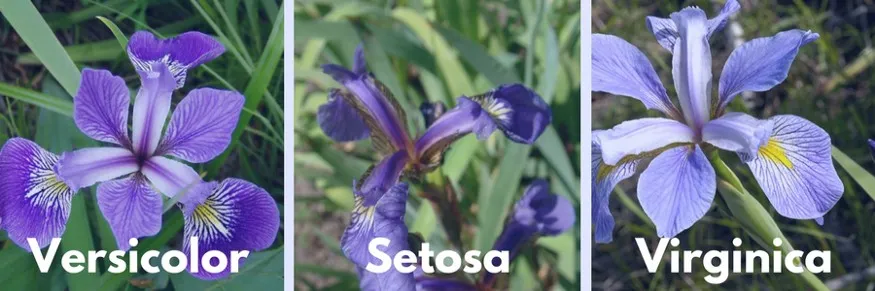

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

iris = load_iris(as_frame=True)
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['target'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


The data set has 150 rows. There are 50 examples of each of the 3 classes, represented by target 0, 1, 2

In [2]:
print(df.shape)

(150, 6)


<Axes: title={'center': 'Comparison between various species based on sepal length and width'}, xlabel='sepal_length', ylabel='sepal_width'>

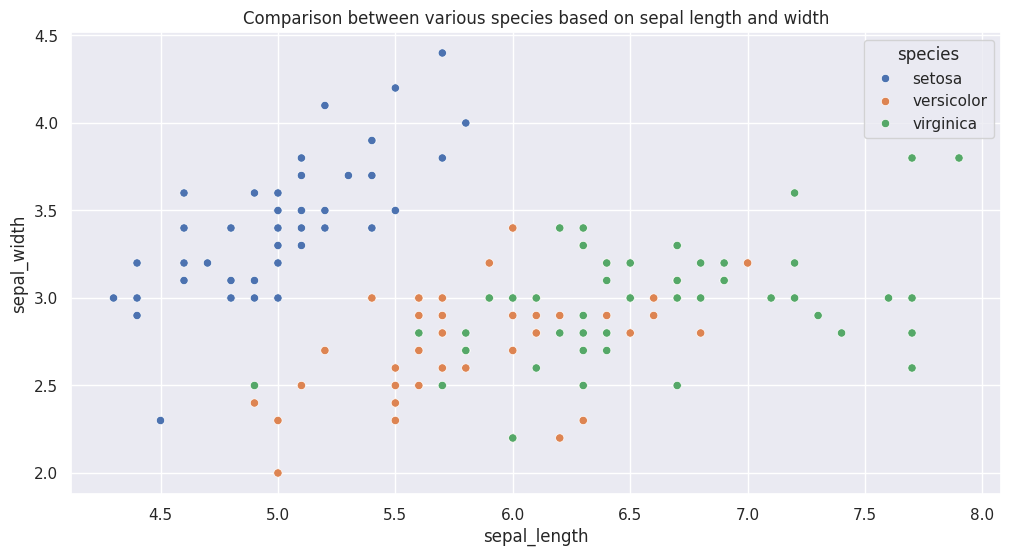

In [16]:
plt.figure(figsize=(12,6))
plt.title("Comparison between various species based on sepal length and width")
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")

<Axes: title={'center': 'Comparison between various species based on petal length and width'}, xlabel='petal_length', ylabel='petal_width'>

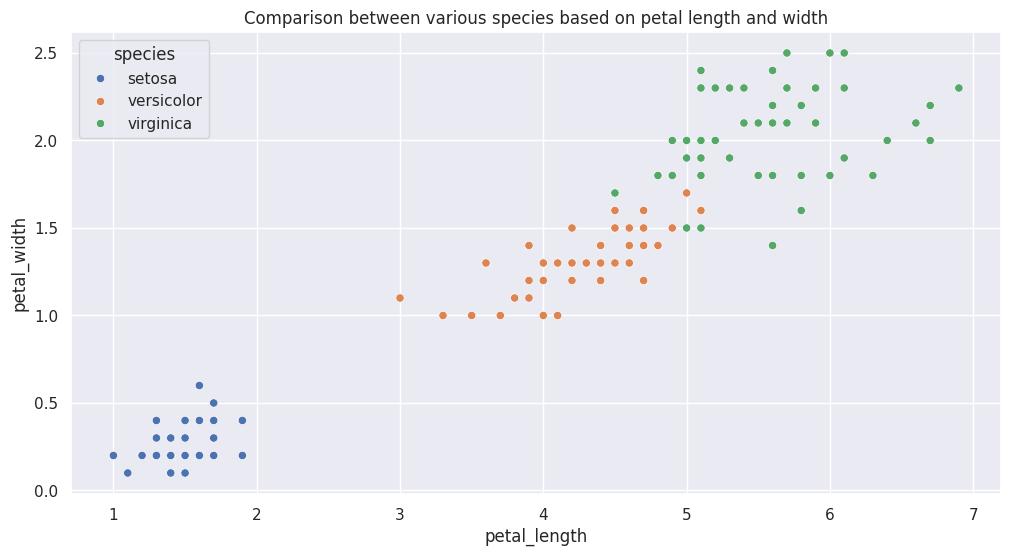

In [15]:
plt.figure(figsize=(12,6))
plt.title("Comparison between various species based on petal length and width")
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

In [10]:
import sklearn
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy

train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [11]:
# X has the various feature columns but not the label
# y has the label
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]# taking the training data features
train_y = train.species# output of our training data

test_X = test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data features
test_y = test.species   #output value of test data

In [12]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm.

The accuracy of the SVM is: 0.9333333333333333


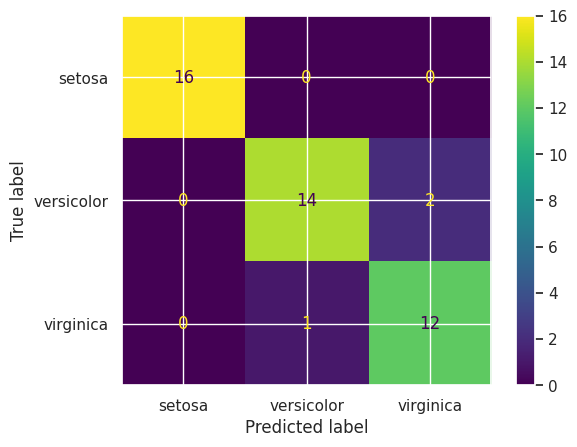

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#predictions = clf.predict(X_test)
cm = confusion_matrix(test_y, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
model2 = LogisticRegression()
model2.fit(train_X,train_y)
prediction2=model2.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction2,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


#Interactive Demos

Tensorflow Playground [playground.tensorflow.org](https://playground.tensorflow.org) may not accessible on the CACIB network

See also https://cloud.google.com/blog/products/ai-machine-learning/understanding-neural-networks-with-tensorflow-playground

https://developers.google.com/machine-learning/crash-course/categorical-data/feature-cross-exercises
